In [10]:
%pip install PyWavelets


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pywt
import numpy as np
import soundfile as sf
from pywt import dwt,idwt

In [12]:
audio_file = 'og.wav'
signal, sr = sf.read(audio_file)
coeffs = dwt(signal, 'db4')
cA,cD=coeffs
low=idwt(cA,None,'db4')
low=idwt(cA,None,'db4')
sf.write('low1.wav',low,sr)

In [16]:
audio_file = 'og.wav'
signal, sr = sf.read(audio_file)
for i in range (1,4):
    (cA,cD)=dwt(signal,'db4')
    low=idwt(cA,None,'db4')
    high=idwt(None,cD,'db4')
    fileNameLow=f'low{i}.wav'
    fileNameHigh=f'high{i}.wav'
    sf.write(fileNameLow,low,sr)
    sf.write(fileNameHigh,high,sr)
    signal,sr=sf.read(fileNameLow)

In [29]:
import matplotlib.pyplot as plt
# fileNameLow="low1.wav"
signal1,Fs1=sf.read('high2.wav')
signal2,Fs2=sf.read('high3.wav')

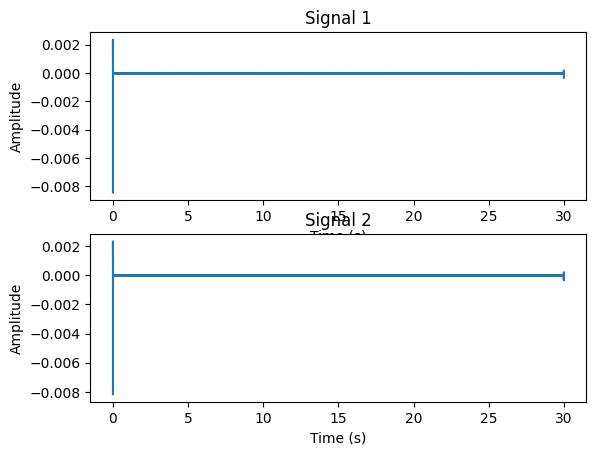

RMS Error: 3.0082036595601455e-05


In [30]:
# Compute the RMS error between the two signals
error = np.sqrt(np.mean((signal1 - signal2)**2))

# Display a plot comparing the two signals
t1 = np.arange(0, len(signal1)/Fs1, 1/Fs1)
t2 = np.arange(0, len(signal2)/Fs2, 1/Fs2)
plt.subplot(2, 1, 1)
plt.plot(t1, signal1)
plt.title('Signal 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(t2, signal2)
plt.title('Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Print the RMS error
print('RMS Error:', error)